# Multiple Linear Regression

## Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

## Importing the dataset

In [26]:
dataset = pd.read_csv('output.csv')
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [47]:
data=dataset.iloc[:,1:14]
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


Text(0.5, 1.0, 'Correlation Coefficient')

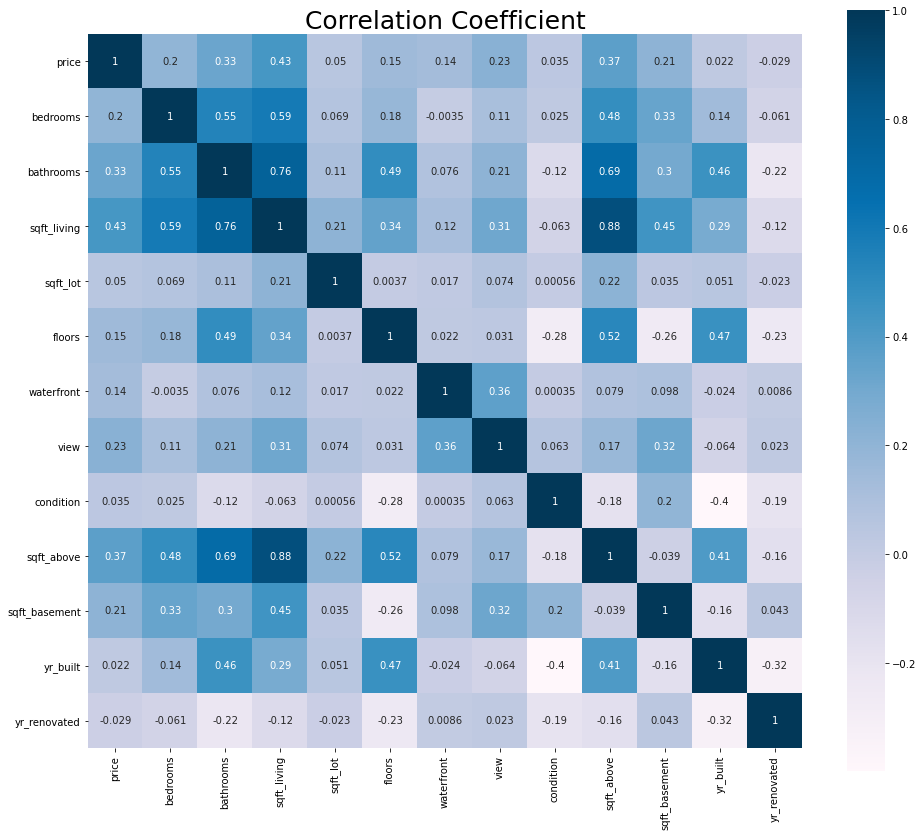

In [50]:

plt.figure(figsize=(16,14))
sns.heatmap(data.corr(),annot=True, square=True,cmap='PuBu')
plt.title('Correlation Coefficient',fontsize=25)

**corrolation matrix illustrates sqft_living and sqft_above and the number of bathrooms has more influene on the price of a House**

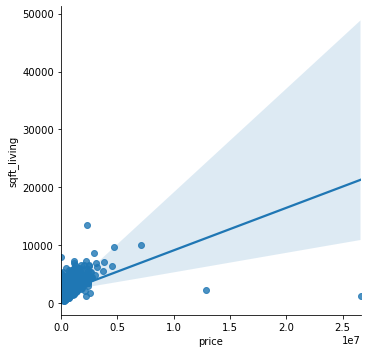

In [78]:
sns.lmplot(x='price',y='sqft_living',data=data)

In [69]:
X = dataset.iloc[:, 2:12].values
y = dataset.iloc[:, 1].values

## Splitting the dataset into the Training set and Test set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [71]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [72]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[538752.02 289000.  ]
 [618399.43 429900.  ]
 [291806.9  129000.  ]
 ...
 [398793.9   83300.  ]
 [422950.36 520000.  ]
 [201920.22 215000.  ]]


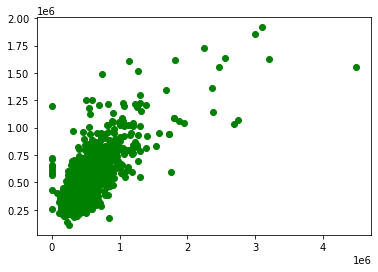

In [79]:
plt.scatter(y_test,y_pred,c='g')

D:\samineh\computer\Anaconda\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

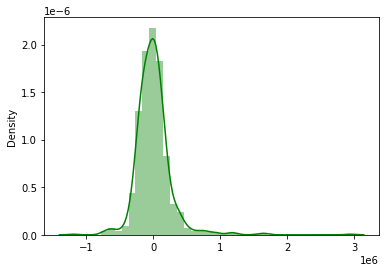

In [80]:
sns.distplot((y_test-y_pred),bins=40,color='g')

## Evaluating the Model Performance

In [73]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test, y_pred)

0.5182697930918361

In [74]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 170264.2831886484
MSE: 71271224408.43016
RMSE: 266966.71030004876


## Applying k-Fold Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score (estimator= regressor , X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("r2_score: {:.3f} %".format(r2_score(y_test, y_pred)*100))

Accuracy: 37.58 %
Standard Deviation: 18.97 %
r2_score: 51.827 %
